In [11]:
import pylab as pl
import pandas as pd
import numpy as np
import numpy as np
import os
import sys
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [12]:
if os.getenv("PUIDATA") is None:
    print ("must set PUIDATA env variable")
    sys.exit()

def getCitiBikeCSV(datestring):
    '''Downloads citibike data and unzips it. If the data is downloaded by not unzippeds it zips it. Moves the data to $PUIDATA
    Arguments:
        date string as yyyymm
    '''
    print ("Downloading", datestring)
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
  
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [13]:
datestring = '201606'
getCitiBikeCSV(datestring)

('Downloading', '201606')
file in place, you can continue


In [14]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1


In [15]:
df['date']=pd.to_datetime(df['starttime'])

In [16]:
 df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date'],
      dtype='object')

In [19]:
df['age'] = 2016 - df['birth year'][(df['usertype'] == 'Subscriber')]

In [39]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,age
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1,2016-06-01 00:00:18,44.0
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1,2016-06-01 00:00:20,49.0
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1,2016-06-01 00:00:21,27.0
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1,2016-06-01 00:00:28,25.0
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1,2016-06-01 00:00:53,27.0


In [40]:
df['age'].dropna(inplace= True)

In [41]:
df.age.describe()

count    1.265112e+06
mean     3.834058e+01
std      1.157717e+01
min      1.600000e+01
25%      2.900000e+01
50%      3.600000e+01
75%      4.600000e+01
max      1.310000e+02
Name: age, dtype: float64

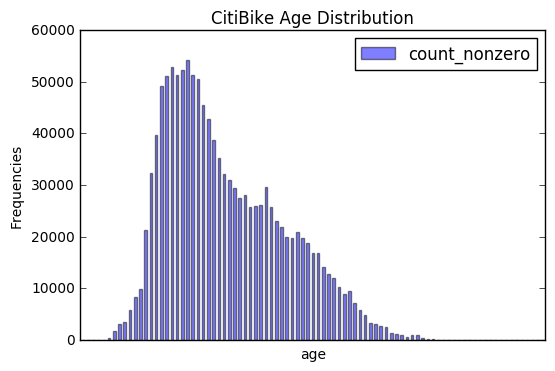

In [42]:
bins = np.arange(10, 100, 1)
ageO = df.age.groupby(pd.cut(df.age, bins)).agg([count_nonzero])
ageO.plot(kind = 'bar', alpha = 0.5)
pl.xticks([])
pl.ylabel('Frequencies')
pl.title('CitiBike Age Distribution')

## 1.KS test

In [46]:
import scipy.stats as ss

#### $H_0:$ The citibike driver age distribution is drawn from gaussian distribution.
#### $H_1:$ The citibike driver age distribution is not drawn from gaussian distribution.
#### Set the signifance level $\alpha$ = 0.05

In [47]:
ss.kstest(df.age, 'norm', args=(df.age.mean(), df.age.std()))

KstestResult(statistic=0.10906210911144343, pvalue=0.0)

#### We can reject the null hypothesis , because the p-value is too small.

## 2.Anderson Darling test

In [48]:
ss.anderson(df.age, 'norm')

AndersonResult(statistic=20106.901539644226, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

#### We can reject the null hypothesis , because the anderson result is too large.

# Try Exponential Distribution

#### $H_0:$ The citibike driver age distribution is drawn from exponential distribution.
#### $H_1:$ The citibike driver age distribution is not drawn from exponential distribution.
#### Set the signifance level $\alpha$ = 0.05

## 1.KS test

In [50]:
ss.kstest(df.age, 'expon', args=(df.age.mean(), df.age.std()))

KstestResult(statistic=0.57927914682652604, pvalue=0.0)

#### We can reject the null hypothesis , because the p-value is too small.

## 2.Anderson Darling test

In [52]:
ss.anderson(df.age, 'expon')

AndersonResult(statistic=293842.9522145302, critical_values=array([ 0.922,  1.078,  1.341,  1.606,  1.957]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

#### We can reject the null hypothesis , because the anderson result is too large.